<a href="https://colab.research.google.com/github/ddarshana04/Machine-Learning/blob/main/KNN-Regression/Iris_dataset_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
type(df)

pandas.core.frame.DataFrame

In [32]:
df.shape

(150, 5)

In [37]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


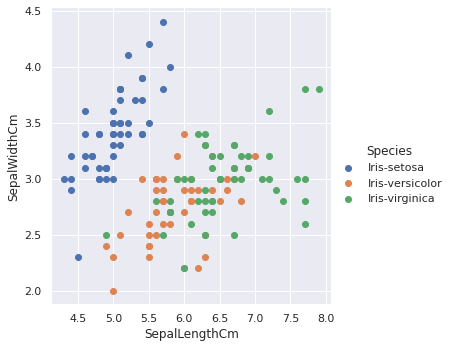

In [39]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


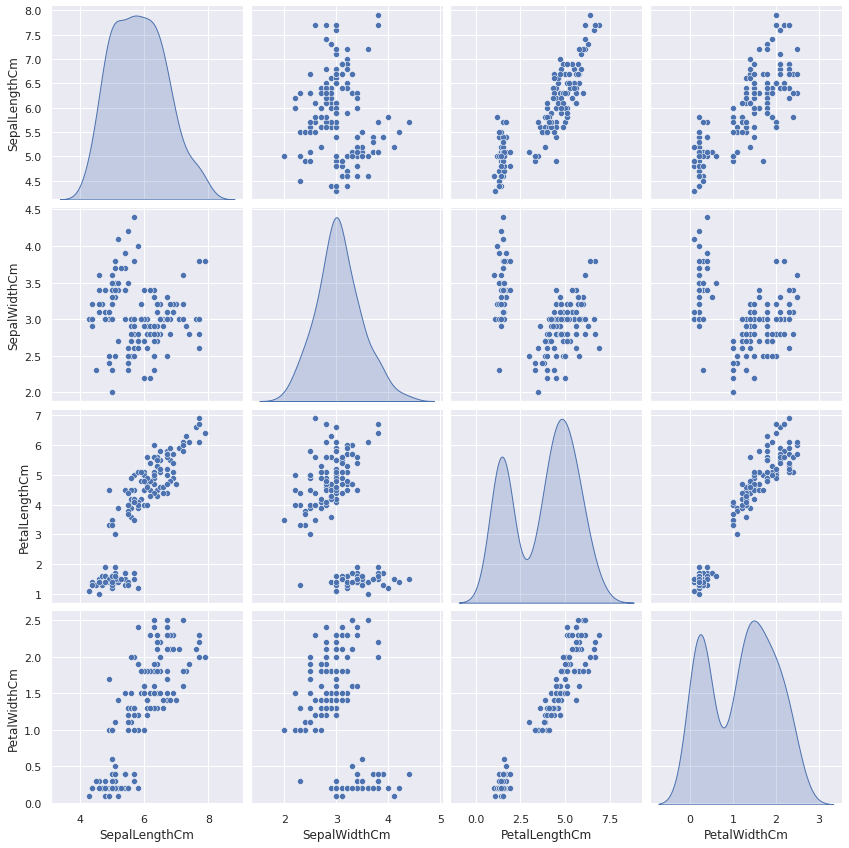

In [40]:
sns.pairplot(df,  size=3, diag_kind="kde");
plt.show()

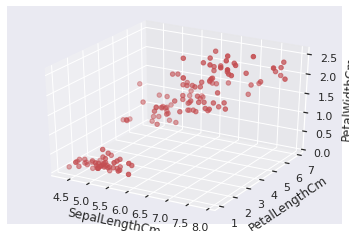

In [41]:
#3D scattered plot.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

x=df["SepalLengthCm"]
y=df["PetalLengthCm"]
z=df["PetalWidthCm"]

ax.scatter(x,y,z,c='r',marker='o');

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

plt.show()


In [42]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


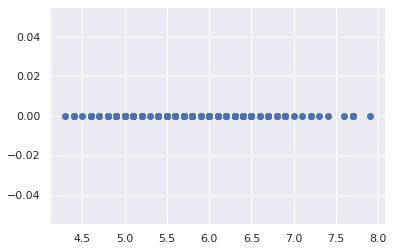

In [43]:
plt.plot(df['SepalLengthCm'], np.zeros_like(df['SepalLengthCm']), 'o')
plt.show()

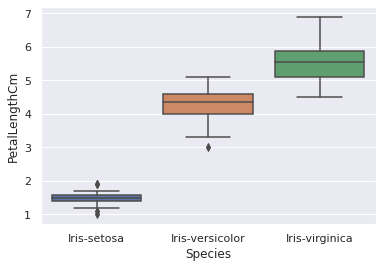

In [44]:
sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.show()

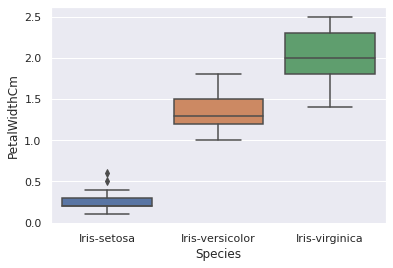

In [45]:
sns.boxplot(x='Species',y='PetalWidthCm', data=df)
plt.show()

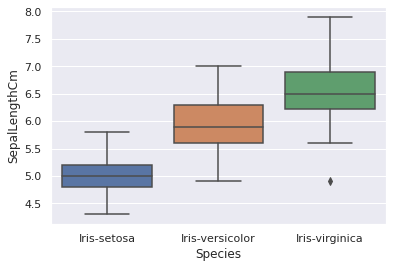

In [46]:
sns.boxplot(x='Species',y='SepalLengthCm', data=df)
plt.show()

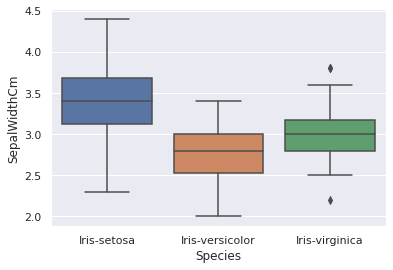

In [47]:
sns.boxplot(x='Species',y='SepalWidthCm', data=df)
plt.show()

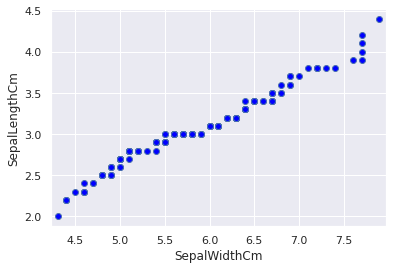

In [48]:
#qq plot to find 2 most correlated features.
import statsmodels.graphics.gofplots as gof
import pylab
gof.qqplot_2samples(df['SepalWidthCm'] , df['SepalLengthCm'], xlabel="SepalWidthCm", ylabel="SepalLengthCm")
pylab.show()

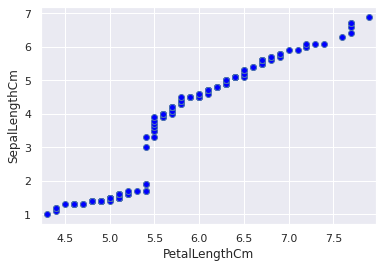

In [49]:
import statsmodels.graphics.gofplots as gof
import pylab
gof.qqplot_2samples(df['PetalLengthCm'] , df['SepalLengthCm'], xlabel="PetalLengthCm", ylabel="SepalLengthCm")
pylab.show()

In [51]:
df.drop('Id',axis=1,inplace=True)

KeyError: ignored

In [52]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


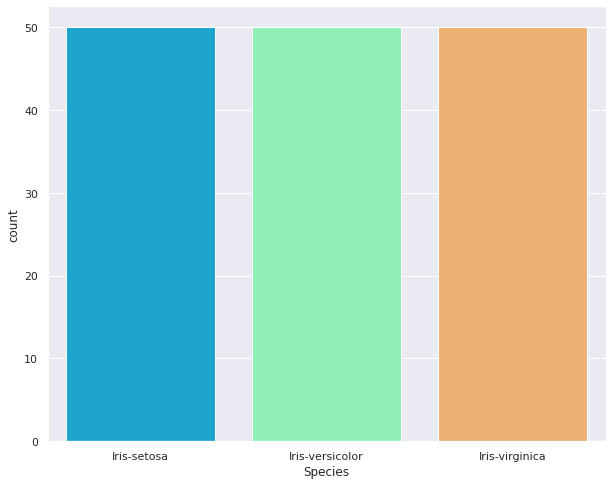

In [53]:
f,ax = plt.subplots(figsize=(10,8))
sns.countplot(x="Species",data=df,palette="rainbow")

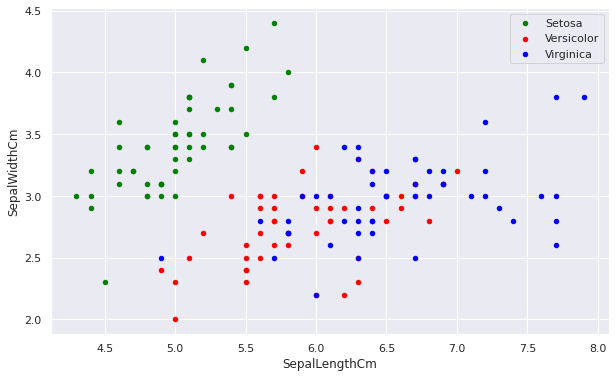

In [54]:
fig = df[df.Species=="Iris-setosa"].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='green',label='Setosa')
r=df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='red',label='Versicolor',ax=fig)
b=df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='blue',label='Virginica',ax=fig)
fig=plt.gcf()
fig.set_size_inches(10,6)

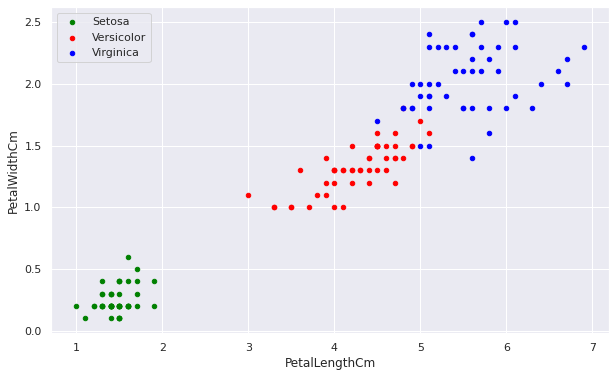

In [55]:
fig=df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='Setosa')
r=df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='red', label='Versicolor',ax=fig)
b=df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Virginica',ax=fig)
fig=plt.gcf()
fig.set_size_inches(10,6)

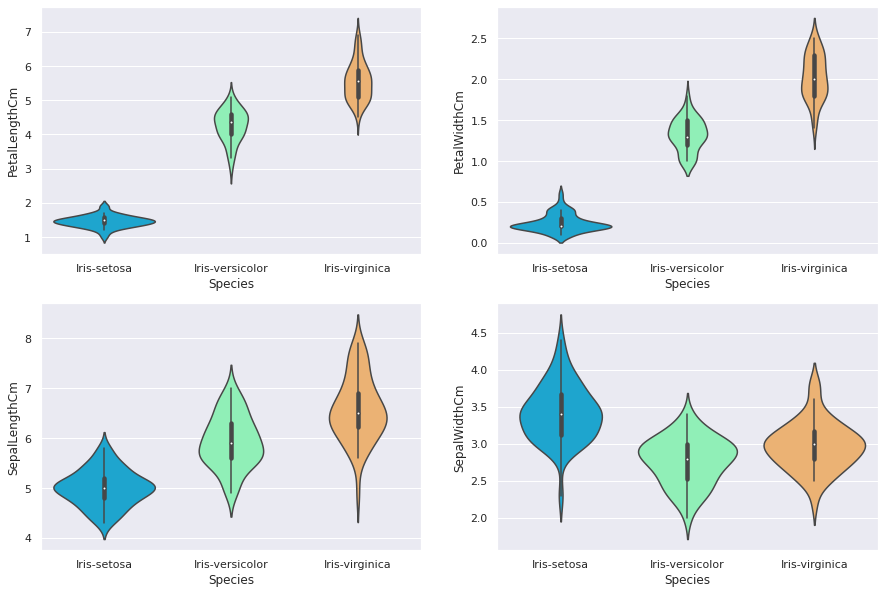

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df,palette="rainbow")
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df,palette="rainbow")
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df,palette="rainbow")
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df,palette="rainbow")

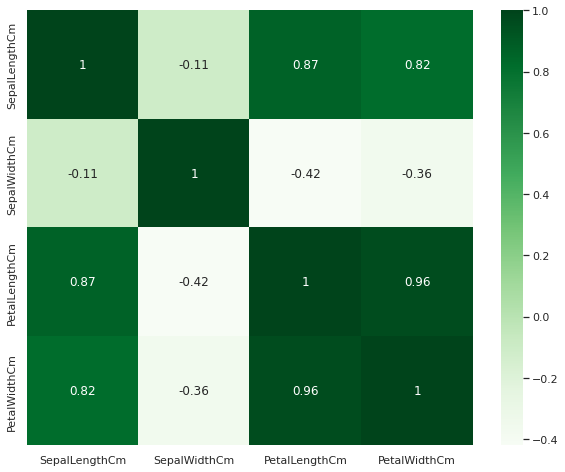

In [57]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [58]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [59]:
def distance(instance1, instance2):
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)

In [60]:
def getNeighbours(data,k):
        distances=[]
        for index in range(len(x_train)):
            d=distance(x_train.iloc[index],data)
            distances.append((d,y_train.iloc[index]))
        distances.sort(key=lambda x:x[0])
        return distances[:k]

In [61]:
y_predict=[]
for i in range(len(x_test)):
    data=x_test.iloc[i]
    data=np.array(data)
    nei=getNeighbours(data,5)
    y_predict.append( mode( nei )[0][0])
for i in range(len(y_predict)):
    y_predict[i]=y_predict[i][1]
    
y_prediction=np.array(y_predict).reshape(1,45)

In [63]:
import scipy.stats
scipy.stats.spearmanr(df['SepalLengthCm'], df['SepalWidthCm'], axis=0)

SpearmanrResult(correlation=-0.15945651848582867, pvalue=0.05128491483834292)

In [64]:
scipy.stats.spearmanr(df['SepalLengthCm'], df['PetalLengthCm'], axis=0)

SpearmanrResult(correlation=0.8813863932886515, pvalue=4.64951031453217e-50)

In [65]:
scipy.stats.spearmanr(df['SepalLengthCm'], df['PetalWidthCm'], axis=0)

SpearmanrResult(correlation=0.8344206519767947, pvalue=3.9702124571318824e-40)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_predict))

Accuracy:  0.9777777777777777


In [69]:
print('Confusion matrix: \n', confusion_matrix(y_test, y_predict))

Confusion matrix: 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
